In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os

In [3]:
def PathToFile(file, path):
    df = pd.DataFrame(columns = ["x", "y"], data = path)
    df.to_csv(file, index=False)

In [4]:
def Line2(start, end, line):
    d = dist(start, end)
    step = 0.25
    r = int(d/step)
    
    for i in range(r+1):
        x = start[0] + (end[0]-start[0])*i/r
        y = start[1] + (end[1]-start[1])*i/r
        line.append([round(x,1),round(y,1)])

            
    PathToFile("Output.csv", line)

In [5]:
def Line3(start, end, line):
    
    line.append(start)
    line.append(end)
    print(line)
            
    PathToFile("Output.csv", line)

In [6]:
def dist(start, end):
    dist=pow(pow(start[0]-end[0],2)+pow(start[1]-end[1],2),0.5)
    return dist

In [7]:
def LinearPath(l):
    line = []
    for i in range (0, len(l)-1):
        Line2(l[i], l[i+1], line)
    PathToFile("Output.csv", line)
    print(line)

In [8]:
def Circle(r, line): 
    theta = np.linspace( 0 , 2 * np.pi , 360 )
    radius = r
    a = radius * np.cos( theta )
    b = radius * np.sin( theta )
    for i in range(0,len(a)):
        line.append([round(a[i],3),round(b[i],3)])
        plt.scatter(round(a[i],3),round(b[i],3))
    PathToFile("Output.csv", line)
    print(line)

In [9]:
def StartPoint(corners):
    x_min = 100000
    y_min = 100000
    y_max = 0
    x_max = 0
    count = 0
    for corner in corners:
        x,y= corner[0]
        x= int((x))
        y= int((y))
    
    #START POINT LOCATER
    
        if(x<x_min):
            x_min = x
            y_min = y
            
        if(y>y_max):
            y_max = y
            x_max = x
            SP_index = count
        count += 1
        
    SP = [x_max, y_max]
    SP_index
    #END START POINT LOCATION
    return SP_index

In [10]:
def ValidateEdge(x1, x2, y1, y2, canny):
    #print(canny2[201+52])
    #find y's midpoint
    #[[[680.  52.]][[151. 544.]][[603. 454.]] [[228. 142.]]]
    m_y = int((y1+y2)/2)
    m_fy = int((y1+m_y)/2)
    m_ty = int((y2+m_y)/2)
    #now x
    m_x = int((x1+x2)/2)
    m_fx = int((x1+m_x)/2)
    m_tx = int((x2+m_x)/2)
    
    n_arr1 = []
    arr1 = []
    p_arr1 = []
    n_arr2 = []
    arr2 = []
    p_arr2 = []
    n_arr3 = []
    arr3 = []
    p_arr3 = []
    
    check_arr1 = []
    check_arr2 = []
    check_arr3 = []
    
    n_arr1_5 = canny[m_fy-5]
    n_arr1_4 = canny[m_fy-4]
    n_arr1_3 = canny[m_fy-3]
    n_arr1_2 = canny[m_fy-2]
    n_arr1_1 = canny[m_fy-1]
    arr1 = canny[m_fy]
    p_arr1_1 = canny[m_fy+1]
    p_arr1_2 = canny[m_fy+2]
    p_arr1_3 = canny[m_fy+3]
    p_arr1_4 = canny[m_fy+4]
    p_arr1_5 = canny[m_fy+5]
    
    n_arr2_5 = canny[m_y-5]
    n_arr2_4 = canny[m_y-4]
    n_arr2_3 = canny[m_y-3]
    n_arr2_2 = canny[m_y-2]
    n_arr2_1 = canny[m_y-1]
    arr2 = canny[m_y]
    p_arr2_1 = canny[m_y+1]
    p_arr2_2 = canny[m_y+2]
    p_arr2_3 = canny[m_y+1]
    p_arr2_4 = canny[m_y+2]
    p_arr2_5 = canny[m_y+1]
    
    n_arr3_5 = canny[m_ty-5]
    n_arr3_4 = canny[m_ty-4]
    n_arr3_3 = canny[m_ty-3]
    n_arr3_2 = canny[m_ty-2]
    n_arr3_1 = canny[m_ty-1]
    arr3 = canny[m_ty]
    p_arr3_1 = canny[m_ty+1]
    p_arr3_2 = canny[m_ty+2]
    p_arr3_3 = canny[m_ty+3]
    p_arr3_4 = canny[m_ty+4]
    p_arr3_5 = canny[m_ty+5]
    
    for x in range(m_fx-8, m_fx+8):
        check_arr1.append(n_arr1_5[x])
        check_arr1.append(n_arr1_4[x])
        check_arr1.append(n_arr1_3[x])
        check_arr1.append(n_arr1_2[x])
        check_arr1.append(n_arr1_1[x])
        check_arr1.append(arr1[x])
        check_arr1.append(p_arr1_1[x])
        check_arr1.append(p_arr1_2[x])
        check_arr1.append(p_arr1_3[x])
        check_arr1.append(p_arr1_4[x])
        check_arr1.append(p_arr1_5[x])
    
    for x in range(m_x-12, m_x+12):
        check_arr2.append(n_arr2_5[x])
        check_arr2.append(n_arr2_4[x])
        check_arr2.append(n_arr2_3[x])
        check_arr2.append(n_arr2_2[x])
        check_arr2.append(n_arr2_1[x])
        check_arr2.append(arr2[x])
        check_arr2.append(p_arr2_1[x])
        check_arr2.append(p_arr2_2[x])
        check_arr2.append(n_arr2_3[x])
        check_arr2.append(n_arr2_4[x])
        check_arr2.append(n_arr2_5[x])
        
    for x in range(m_tx-8, m_tx+8):
        check_arr3.append(n_arr3_5[x])
        check_arr3.append(n_arr3_4[x])
        check_arr3.append(n_arr3_3[x])        
        check_arr3.append(n_arr3_2[x])
        check_arr3.append(n_arr3_1[x])
        check_arr3.append(arr3[x])
        check_arr3.append(p_arr3_1[x])
        check_arr3.append(p_arr3_2[x])
        check_arr3.append(p_arr3_3[x])
        check_arr3.append(p_arr3_4[x])
        check_arr3.append(p_arr3_5[x])
        
        
    flag1 = False
    flag2 = False
    flag3 = False
    
    for y in check_arr1:
        if(y == 255):
            flag1 = True
            
    for y in check_arr2:
        if(y == 255):
            flag2 = True
            
    for y in check_arr3:
        if(y == 255):
            flag3 = True
        
    return (flag1 and flag2 and flag3)

In [11]:
def GetAllEdges(corn, canny):
    index1 = 0
    index2 = 0
    edges = []
    included = False
    for c1 in corn:
        index2 = 0
        for c2 in corn:
            if(c1[0][0] != c2[0][0] or c1[0][1] != c2[0][1]):
                if(ValidateEdge(c1[0][0], c2[0][0], c1[0][1], c2[0][1], canny) == True):
                    #edges.append([index1, index2])
                    if(len(edges) != 0):
                        for e in edges:
                            if((e[0] == index1 or e[0] == index2) and (e[1] == index1 or e[1] == index2)):
                                included = True
                        if(included == False):
                            edges.append([index1, index2])
                    else:
                        edges.append([index1, index2])
                    included = False
            index2 += 1
        index1 += 1
    return edges

In [12]:
def GetPath(edges, SP_index):
    visited = []
    index = SP_index
    next_index = index
    enter = False

    while(len(edges) != 0):
        for e in edges:
            if(e[0]==next_index):
                next_index = e[1]
                visited.append(e)
                edges.remove(e)
            elif(e[1]==next_index):
                next_index = e[0]
                visited.append([e[1],e[0]])
                edges.remove(e)
            else:
                enter = True
    return visited

In [13]:
def PathCoordinates(corners, visited):
    path = []
    for v in visited:
        path.append([corners[v[0]][0][0], corners[v[0]][0][1]])
    
    path.append(path[0])    
    return path

In [14]:
def GetAllCorners(image_name):
    image_path = os.path.join('Pictures',image_name)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
    resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
    corners= cv2.goodFeaturesToTrack(gray, 100, 0.1, 30)
    return corners

In [15]:
def GetAllCurvedCorners(image_name):
    image_path = os.path.join('Pictures',image_name)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
    resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
    corners= cv2.goodFeaturesToTrack(gray, 200, 0.003, 20)
    return corners

In [16]:
def GetCanny(image_name):
    image_path = os.path.join('Pictures',image_name)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
    return canny

In [17]:
def GetFileName(image_name):
    x = image_name.split(".")
    y = []
    y.append(x[0])
    y.append('.csv')
    file = ""+y[0]+""+y[1]
    return file

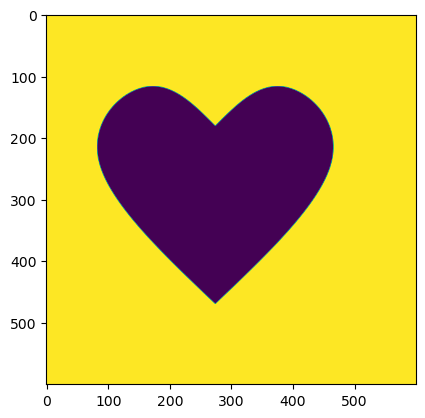

In [25]:
image_path = os.path.join('Pictures','heart.png')
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
blur = cv2.GaussianBlur(gray, (5,5), 0)

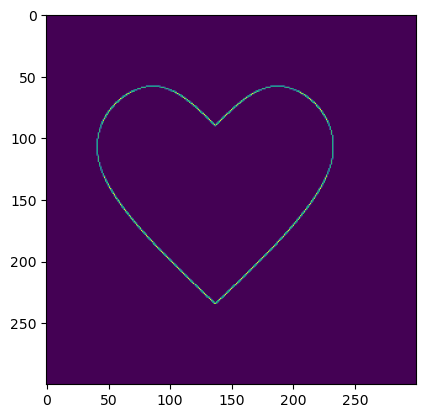

In [26]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, threshold1 = 160, threshold2 = 200)
resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('Frame View', resize_image)
plt.imshow(resize_image)

[[[274. 180.]]

 [[274. 468.]]

 [[ 86. 190.]]

 [[462. 190.]]

 [[399. 121.]]

 [[149. 121.]]

 [[349. 122.]]

 [[ 87. 244.]]

 [[460. 248.]]

 [[200. 122.]]

 [[437. 294.]]

 [[111. 294.]]]


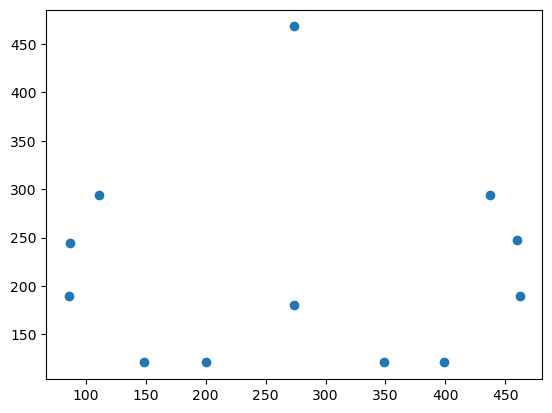

In [28]:
corners= cv2.goodFeaturesToTrack(gray, 200, .001, 50)
print((corners))
x = []
y = []

for c in corners:
    x.append(int(c[0][0])) 
    y.append(int(c[0][1]))
plt.scatter(x, y)

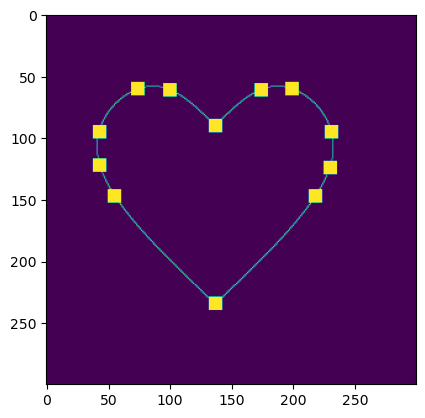

In [29]:
x_min = 100000
y_max = 0
for corner in corners:
    x,y= corner[0]
    x= int((x)/2)
    y= int((y)/2)
    cv2.rectangle(resize_image, (x-5,y-5),(x+5,y+5),(255,0,0),-1)

    
plt.imshow(resize_image)

In [25]:
edges = GetAllEdges(corners, canny)
print((edges))

[[0, 10], [0, 14], [1, 5], [1, 9], [2, 13], [3, 9], [4, 8], [5, 15], [6, 10], [11, 14], [12, 15]]


In [326]:
SP_index = StartPoint(corners)
print(SP_index)

1


In [321]:
index1 = 0
index2 = 0
included = False
c1 = [[399, 121]]
c2 = [[349, 122]]
print(c1[0][0] != c2[0][0] or c1[0][1] != c2[0][1])
if(c1[0][0] != c2[0][0] or c1[0][1] != c2[0][1]):
    print(ValidateEdge(c1[0][0], c2[0][0], c1[0][1], c2[0][1], canny))
    if(ValidateEdge(c1[0][0], c2[0][0], c1[0][1], c2[0][1], canny) == True):
        print("hits")
                    #edges.append([index1, index2])
        if(len(edges) != 0):
            for e in edges:
                if((e[0] == index1 or e[0] == index2) and (e[1] == index1 or e[1] == index2)):
                    included = True
            if(included == False):
                edges.append([index1, index2])
        else:
            edges.append([index1, index2])
        included = False

True
True
hits


In [312]:
canny[156]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [327]:
visited = []
index = SP_index
next_index = index
enter = False
print(index)
print(edges)
while(len(edges) != 0):
    for e in edges:
        if(e[0]==next_index):
            next_index = e[1]
            visited.append(e)
            edges.remove(e)
        elif(e[1]==next_index):
            next_index = e[0]
            visited.append([e[1],e[0]])
            edges.remove(e)
        else:
            enter = True
print(visited)

1
[[0, 6], [0, 9], [1, 10], [1, 11], [2, 5], [2, 7], [3, 4], [3, 8], [4, 6], [5, 9], [7, 11], [8, 10]]
[[1, 10], [10, 8], [8, 3], [3, 4], [4, 6], [6, 0], [0, 9], [9, 5], [5, 2], [2, 7], [7, 11], [11, 1]]
